 ### Algo and Process ###
 
 **Coupon CSV**
 
 This file placed in data folder is the source of data for our project

**prompt.ipynb**

This Python file will be used to verfiy logic and check data sets
It will be kind of rough work sheet for the final program

**checkCouponAcceptance.ipynb**

This file will have the final set of code to be executed

**Result folder**

This folder will store all the required graphs that comes out as an output

**Flow Details**

Final Objective: Will a customer accept the coupon?
 

----------------------------------------------------------------------------

**Import Required Libraries**


In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [56]:
data = pd.read_csv('data/coupons.csv')

In [57]:
data.sample(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
11523,No Urgent Place,Friend(s),Snowy,30,2PM,Restaurant(<20),1d,Male,below21,Single,...,gt8,gt8,gt8,less1,1,0,0,0,1,1
602,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Single,...,never,4~8,1~3,less1,1,0,0,1,0,1
8070,Home,Alone,Sunny,30,6PM,Carry out & Take away,2h,Male,21,Single,...,never,4~8,gt8,1~3,1,1,0,1,0,1
12405,Home,Alone,Sunny,80,6PM,Carry out & Take away,2h,Female,36,Married partner,...,NaN,1~3,1~3,1~3,1,1,0,1,0,1
7674,No Urgent Place,Alone,Sunny,80,10AM,Coffee House,1d,Male,36,Single,...,never,1~3,less1,less1,1,0,0,0,1,0
6997,No Urgent Place,Kid(s),Rainy,55,6PM,Carry out & Take away,2h,Female,31,Married partner,...,1~3,less1,1~3,1~3,1,1,0,0,1,0
2221,Work,Alone,Sunny,55,7AM,Coffee House,2h,Male,36,Married partner,...,never,4~8,4~8,1~3,1,1,1,0,1,0
960,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,21,Married partner,...,less1,1~3,4~8,less1,1,1,0,0,1,0
5682,Home,Alone,Sunny,80,6PM,Coffee House,1d,Male,21,Single,...,1~3,gt8,4~8,never,1,0,0,1,0,1
2407,Work,Alone,Sunny,55,7AM,Coffee House,2h,Female,50plus,Married partner,...,never,4~8,gt8,less1,1,1,0,0,1,0


---
**2. Investigate the dataset for missing or problematic data.**
-

In [58]:
print(f"Length of Dataset:{len(data)}")
data.isnull().sum()

Length of Dataset:12684


destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

---
**3. Decide what to do about your missing data -- drop, replace, other...**
-


This explains that major data is missing for vehicle related data. About 99% of the records are missing this information. So I will ignore this column in determing if a coupon will be accepted or not.

In [59]:
data = data.drop(columns=["car"], errors="ignore")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

---
**4. What proportion of the total observations chose to accept the coupon?**
-

Initially I will try and figure out a basic acceptance check

1. We will try to figure how many people have accepted vs not accepted
2. Next I will try to figure out the above result based on Gender
3. Third, I will try to figure out the acceptance result based on type of Restaurant provided in the coupon
4. Finally, we will get specific details based on gender and type of restaurant for which the coupon has been accepted


I will delete any record in case the value is blank for any of the fields for any row



I will analyze based on the 4 fields

1. coupon
2. gender
3. coupon accepted (Y)

For that I will modify the existing dataset to a new smaller and cleaner dataset: **ds_basic_acceptance**
It will have only the above 3 field and index field
I will update the field name of "Y" to "Coupon Accepted" and "coupon" to "Restaurant Type"

In [60]:
ds_basic_acceptance = data[["coupon","gender","Y"]]
ds_basic_acceptance = ds_basic_acceptance.rename(columns = {"coupon" : "Restaurant Type",
                                                           "Y" : "Coupon Accepted"})
ds_basic_acceptance.sample(10)

,Restaurant Type,gender,Coupon Accepted
10444,Restaurant(<20),Female,1
6848,Coffee House,Female,0
3298,Coffee House,Male,1
5554,Coffee House,Female,1
3860,Coffee House,Female,0
2226,Coffee House,Male,0
8766,Carry out & Take away,Female,0
9266,Coffee House,Male,0
9232,Bar,Male,1
3082,Coffee House,Male,0


**Accepted Vs Not Accepted**

In [61]:
label_map = {1: "Accepted", 0: "Rejected"}
total_number_of_coupon_accepted = ds_basic_acceptance["Coupon Accepted"].map(label_map).value_counts()
print(total_number_of_coupon_accepted)

Coupon Accepted
Accepted    7210
Rejected    5474
Name: count, dtype: int64


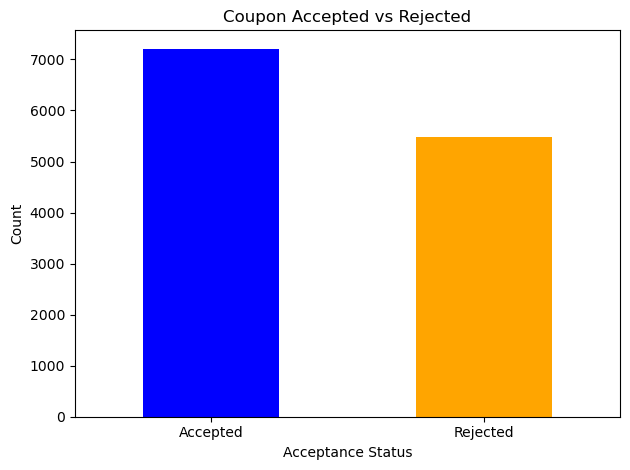

In [79]:
total_number_of_coupon_accepted.plot(kind="bar", color=["blue", "orange"])
plt.title("Coupon Accepted vs Rejected")
plt.xlabel("Acceptance Status")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("plots/4a_accepted_vs_rejected.png")
plt.show()
plt.close()

**Accepted Vs Rejected based on Gender**

In [64]:
ds_basic_acceptance["acceptance_status"] = ds_basic_acceptance["Coupon Accepted"].map(label_map)

total_number_of_coupon_accepted_by_gender = ds_basic_acceptance.groupby("gender")["acceptance_status"].value_counts().unstack(fill_value=0)
print(total_number_of_coupon_accepted_by_gender)

acceptance_status  Accepted  Rejected
gender                               
Female                 3563      2948
Male                   3647      2526


In [41]:
ds_basic_acceptance.sample(10)

,Restaurant Type,gender,Coupon Accepted,acceptance_status
7643,Restaurant(20-50),Male,0,Rejected
9862,Carry out & Take away,Male,1,Accepted
2091,Restaurant(20-50),Female,0,Rejected
2180,Carry out & Take away,Male,0,Rejected
8979,Coffee House,Female,1,Accepted
11146,Restaurant(20-50),Female,0,Rejected
6718,Restaurant(<20),Female,1,Accepted
494,Coffee House,Male,1,Accepted
6551,Carry out & Take away,Female,1,Accepted
1589,Restaurant(<20),Male,1,Accepted


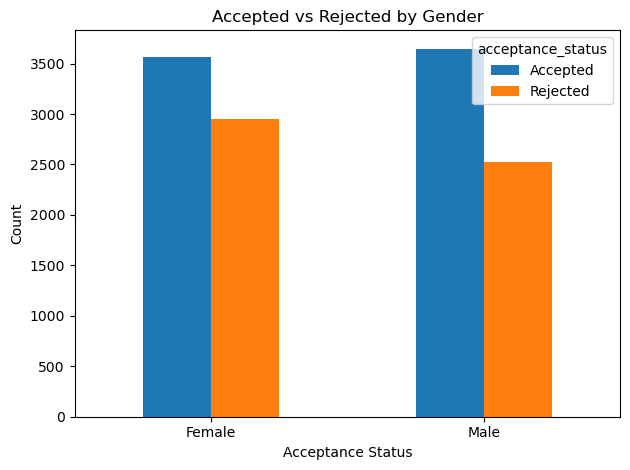

In [80]:
total_number_of_coupon_accepted_by_gender.plot(kind="bar")
plt.title("Accepted vs Rejected by Gender")
plt.xlabel("Acceptance Status")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("plots/4b_accepted_vs_rejected_by_gender.png")
plt.show()
plt.close()

This plot explain Males are more prone to acceptance as their acceptance is Higher and rejection is Lower than Females

**Accepted Vs Rejected based on Gender and Type of Restaurant**

In [85]:
total_number_of_coupon_accepted_by_gender_by_type = ds_basic_acceptance.groupby(["gender","Restaurant Type"])["acceptance_status"].value_counts().unstack(fill_value=0)
print(total_number_of_coupon_accepted_by_gender_by_type)

acceptance_status             Accepted  Rejected
gender Restaurant Type                          
Female Bar                         356       689
       Carry out & Take away       885       355
       Coffee House               1010      1041
       Restaurant(20-50)           322       432
       Restaurant(<20)             990       431
Male   Bar                         471       501
       Carry out & Take away       875       278
       Coffee House                985       960
       Restaurant(20-50)           336       402
       Restaurant(<20)             980       385


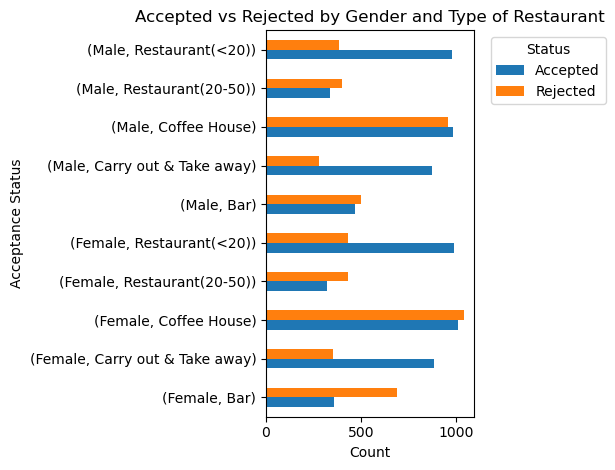

In [100]:
total_number_of_coupon_accepted_by_gender_by_type.plot(kind="barh")

plt.title("Accepted vs Rejected by Gender and Type of Restaurant")
plt.xlabel("Count")
plt.ylabel("Acceptance Status")
plt.xticks(rotation=0)
plt.legend(title="Status", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.savefig("plots/4c_accepted_vs_rejected_by_gender_by_type.png")
plt.show()
plt.close()

**Accepted Vs Rejected based on Type of Restaurant**

In [98]:
total_number_of_coupon_accepted_by_type = ds_basic_acceptance.groupby("Restaurant Type")["acceptance_status"].value_counts().unstack(fill_value=0)
print(total_number_of_coupon_accepted_by_type)

acceptance_status      Accepted  Rejected
Restaurant Type                          
Bar                         827      1190
Carry out & Take away      1760       633
Coffee House               1995      2001
Restaurant(20-50)           658       834
Restaurant(<20)            1970       816


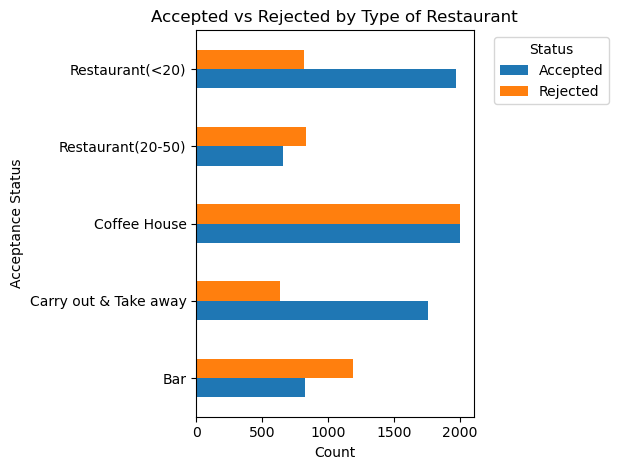

In [101]:
total_number_of_coupon_accepted_by_type.plot(kind="barh")

plt.title("Accepted vs Rejected by Type of Restaurant")
plt.xlabel("Count")
plt.ylabel("Acceptance Status")
plt.xticks(rotation=0)
plt.legend(title="Status", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.savefig("plots/4d_accepted_vs_rejected_by_type.png")
plt.show()
plt.close()

---
**Inference**
-

So what can we understand from above analysis performed:
1. Males are more prone to accept Coupons
2. Restaurant < 20 and Carry-out/Take away has higher percentage of acceptance amongst both Men and Women
3. Coffee has almost equal acceptance or rejection
4. People are avoiding high end restaurant and bars
5. Bars are having the highest rejection, which gives a place for additional research as to when or by whom such coupons are more accepted or rejected

---
**5. Use a bar plot to visualize the `coupon` column. **
-

In [103]:
total_number_of_coupon_by_type = ds_basic_acceptance['Restaurant Type'].value_counts()
print(total_number_of_coupon_by_type)

Restaurant Type
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64


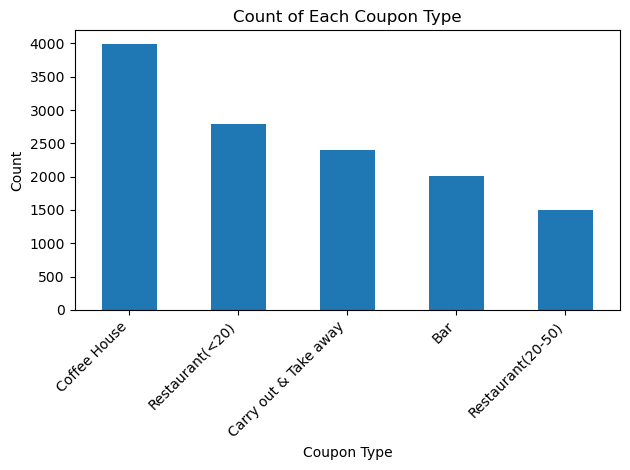

In [105]:
total_number_of_coupon_by_type.plot(kind='bar')

plt.title("Count of Each Coupon Type")
plt.xlabel("Coupon Type")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("plots/5_coupons_by_type.png")
plt.show()
plt.close()

---
**Infernece**
-

1. Coffee House is the highest offered coupon but gets the highest rejection. We can analyze the most favourable condition of acceptance and improve the rate
2. Restaurants (<20) and Carry-out might be promoted more as the acceptance rate is higher
3. We need further analysis on Bar and Restaurant (20-50)

---
**6. Use a histogram to visualize the temperature column.**
-


In [109]:
#ds_additional_analysis = ds_basic_acceptance
ds_additional_analysis = ds_basic_acceptance.merge(data[['temperature']], left_index=True, right_index=True, how='left')
ds_additional_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Restaurant Type    12684 non-null  object
 1   gender             12684 non-null  object
 2   Coupon Accepted    12684 non-null  int64 
 3   acceptance_status  12684 non-null  object
 4   temperature        12684 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 495.6+ KB


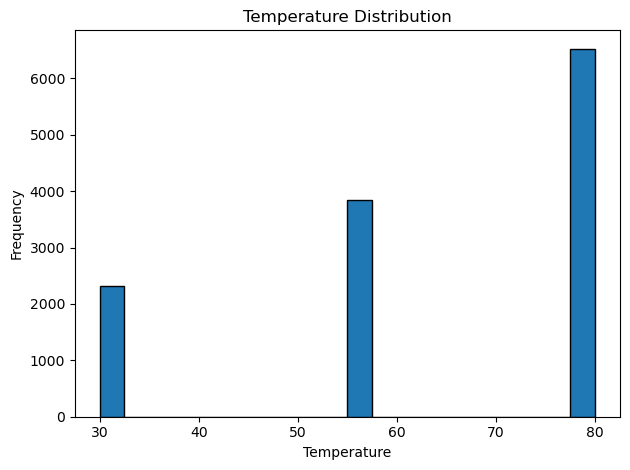

In [113]:
plt.hist(ds_additional_analysis['temperature'], bins=20, edgecolor='black')

plt.title("Temperature Distribution")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("plots/6a_temperature_hist.png")
plt.show()
plt.close()

So there are mainly 3 temperatures: 30(Snowy), 55(Rainy), 80(Sunny) with most coupons getting offered during Sunny days

Usually, people would love to go to Coffee house when it is Snowy or Rainy.
I will take the above data and try to find out if my assumption is correct or the rejection of Coffee House coupon is irrespective of the temperature

In [127]:
ds_additional_analysis_filtered = ds_additional_analysis[ds_additional_analysis['Restaurant Type'] == "Coffee House"]
ds_additional_analysis_filtered.sample(10)

total_number_of_coffee_house_coupon_accepted_by_temperature = ds_additional_analysis_filtered.groupby('temperature')['acceptance_status'].value_counts().unstack(fill_value=0)

print(total_number_of_coffee_house_coupon_accepted_by_temperature)

acceptance_status  Accepted  Rejected
temperature                          
30                      141       177
55                      582       695
80                     1272      1129


So seems my assumption was incorrect.
Maximum offer for Coffee House coupon was during Sunny day with greater acceptance. On other day condition the rejection was higher

In [129]:
total_number_of_coupon_accepted_by_temperature_by_type = ds_additional_analysis.groupby(['temperature','Restaurant Type'])['acceptance_status'].value_counts().unstack(fill_value=0)
print(total_number_of_coupon_accepted_by_temperature_by_type)

acceptance_status                  Accepted  Rejected
temperature Restaurant Type                          
30          Bar                         139       287
            Carry out & Take away       568       183
            Coffee House                141       177
            Restaurant(20-50)            92       181
            Restaurant(<20)             290       258
55          Bar                         427       529
            Carry out & Take away       414       162
            Coffee House                582       695
            Restaurant(20-50)           156       212
            Restaurant(<20)             482       181
80          Bar                         261       374
            Carry out & Take away       778       288
            Coffee House               1272      1129
            Restaurant(20-50)           410       441
            Restaurant(<20)            1198       377


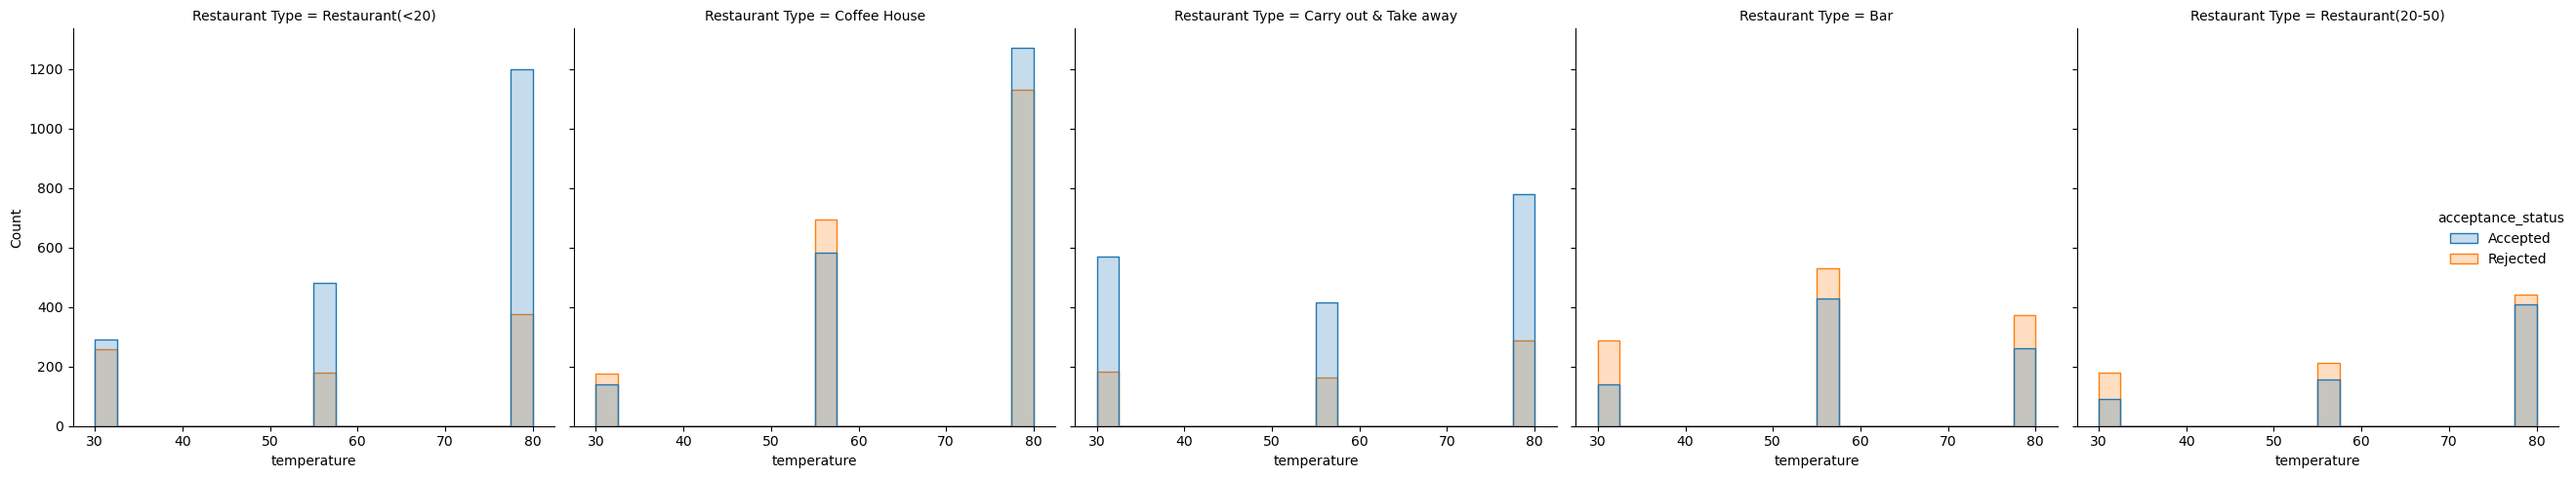

In [137]:
sns.displot( data=ds_additional_analysis, x="temperature", hue="acceptance_status", col="Restaurant Type", bins=20, kde=False, element="step" )
plt.tight_layout()
plt.savefig("plots/6b_temperature_type_hist.png")
plt.show()
plt.close()

---
**BAR COUPONS**
-

---

**1. Create a new `DataFrame` that contains just the bar coupons.**
-

In [138]:
ds_bar_filtered = ds_additional_analysis[ds_additional_analysis['Restaurant Type'] == "Bar"]
ds_bar_filtered.sample(10)

,Restaurant Type,gender,Coupon Accepted,acceptance_status,temperature
8256,Bar,Female,0,Rejected,55
7986,Bar,Male,0,Rejected,80
10248,Bar,Female,0,Rejected,55
1733,Bar,Male,0,Rejected,80
584,Bar,Male,1,Accepted,55
12040,Bar,Male,1,Accepted,30
7600,Bar,Female,1,Accepted,55
12660,Bar,Male,0,Rejected,30
4655,Bar,Female,1,Accepted,80
3923,Bar,Female,0,Rejected,55


---
**2. What proportion of bar coupons were accepted?**
-

In [140]:
total_number_of_bar_coupon_accepted = ds_bar_filtered["acceptance_status"].value_counts()
print(total_number_of_bar_coupon_accepted)

acceptance_status
Rejected    1190
Accepted     827
Name: count, dtype: int64


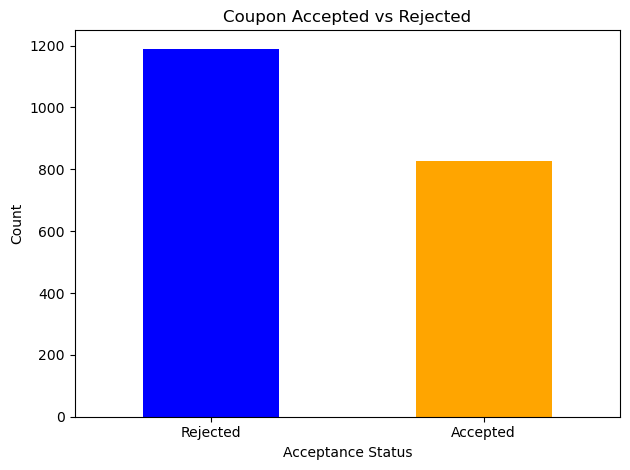

In [141]:
total_number_of_bar_coupon_accepted.plot(kind="bar", color=["blue", "orange"])
plt.title("Coupon Accepted vs Rejected")
plt.xlabel("Acceptance Status")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("plots/bar_accepted_vs_rejected.png")
plt.show()
plt.close()